<a href="https://colab.research.google.com/github/d4rk3dge/iitm_hackathon/blob/main/REDWX_Green_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ticker = "REDWX"
start_date = "2023-01-01"
end_date ="2024-01-03"

data  = yf.download(ticker,start=start_date, end=end_date)
print(data)

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-01-03  13.640000  13.640000  13.640000  13.640000  13.640000       0
2023-01-04  13.800000  13.800000  13.800000  13.800000  13.800000       0
2023-01-05  13.610000  13.610000  13.610000  13.610000  13.610000       0
2023-01-06  13.890000  13.890000  13.890000  13.890000  13.890000       0
2023-01-09  13.890000  13.890000  13.890000  13.890000  13.890000       0
...               ...        ...        ...        ...        ...     ...
2023-12-26  16.820000  16.820000  16.820000  16.820000  16.820000       0
2023-12-27  16.860001  16.860001  16.860001  16.860001  16.860001       0
2023-12-28  16.889999  16.889999  16.889999  16.889999  16.889999       0
2023-12-29  16.760000  16.760000  16.760000  16.760000  16.760000       0
2024-01-02  16.629999  16.629999  16.629999

In [ ]:
df = pd.DataFrame(data)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,13.64,13.64,13.64,13.64,13.64,0
2023-01-04,13.80,13.80,13.80,13.80,13.80,0
2023-01-05,13.61,13.61,13.61,13.61,13.61,0
2023-01-06,13.89,13.89,13.89,13.89,13.89,0
2023-01-09,13.89,13.89,13.89,13.89,13.89,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-01-03 to 2024-01-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.0
mean,15.007649,15.007649,15.007649,15.007649,15.007649,0.0
std,0.713137,0.713137,0.713137,0.713137,0.713137,0.0
min,13.610000,13.610000,13.610000,13.610000,13.610000,0.0
25%,14.475000,14.475000,14.475000,14.475000,14.475000,0.0
50%,14.910000,14.910000,14.910000,14.910000,14.910000,0.0
75%,15.505000,15.505000,15.505000,15.505000,15.505000,0.0
max,16.889999,16.889999,16.889999,16.889999,16.889999,0.0


In [ ]:
df['date'] = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2023-01-03,13.64,13.64,13.64,13.64,13.64,0,2023-01-03
2023-01-04,13.80,13.80,13.80,13.80,13.80,0,2023-01-04
2023-01-05,13.61,13.61,13.61,13.61,13.61,0,2023-01-05
2023-01-06,13.89,13.89,13.89,13.89,13.89,0,2023-01-06
2023-01-09,13.89,13.89,13.89,13.89,13.89,0,2023-01-09


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open = df['Open'],
                high = df['High'],
                low = df['Low'],
                close = df['Close'])] )

fig.update_layout(
    title = "Green Finance Chart MUFIN.NS",
    yaxis_title = "Price ($)",
    xaxis_rangeslider_visible= False)

fig.show()

In [ ]:
df.drop(['date','Volume'],axis=1, inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

<Axes: >

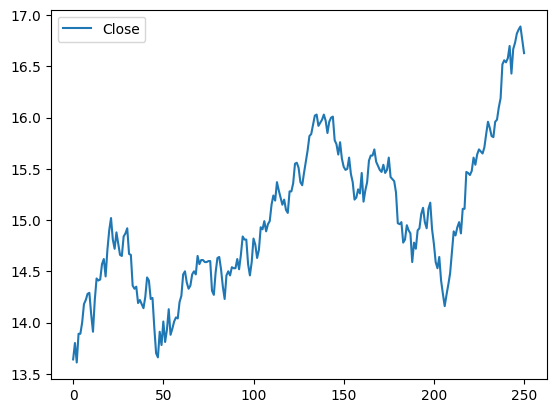

In [ ]:
df.plot.line(y="Close",use_index=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
x = df[['Open','Close','High','Low','Adj Close']]
y = df['Close']
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'mse:{mse} r2:{r2}')

mse:0.00034118683293235443 r2:0.9992137676049249


In [ ]:
diff = pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual','Predicted'])
diff

,Actual,Predicted
0,15.370000,15.370200
1,14.180000,14.188400
2,15.580000,15.572100
3,14.260000,14.259400
4,15.370000,15.370200
5,14.980000,14.977500
6,15.170000,15.181600
7,16.889999,16.837700
8,14.290000,14.278800
9,15.100000,15.109100


<ipython-input-41-6f93269b9891>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-41-6f93269b9891>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




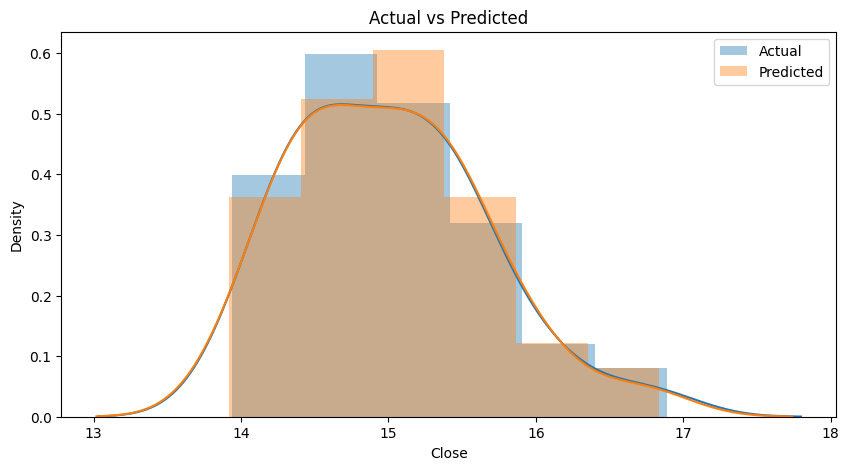

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(y_test, label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()